# Importing Sibilla
**Sibilla Project Setup and Build**

This cell performs the following operations:

1. Update package lists:
   Ensures the system has the latest information about available packages:
   ```
   !apt-get update
   ```
2. Install OpenJDK 21:
   Installs an up-to-date Java Development Kit necessary for building the project.
   ```
   !apt-get install openjdk-21-jdk
   ```

3. Clone the Sibilla repository:
   Fetches the latest version of the Sibilla project from GitHub.
   ```
   !git clone https://github.com/quasylab/sibilla
   ```

4. Build the Sibilla project:
   ```
   !cd sibilla && ./gradlew build installDist -x test --parallel
   ```
   - Changes to the Sibilla directory
   - Runs Gradle to build the project and create distribution
   - Skips tests (-x test) to speed up the build process
   - Uses parallel execution (--parallel) to improve build speed on multi-core systems

5. Copy the Sibilla Python scripts:
   Makes the Python interface for Sibilla available in the current directory.
   ```
   !cp -a sibilla/shell/src/dist/scripts/sibilla_py .
   ```

6. Install the Sibilla Python package:
   Makes the Sibilla Python interface available for use in this Colab environment.
   ```
   !cd sibilla_py && pip install .
   ```

After running this cell, Sibilla will be built and its Python interface
will be available for use in subsequent cells of this Colab notebook.

**Note on timing**: This entire process typically takes about **5-6 minutes** to complete. Actual duration may vary based on current Colab resource allocation and network conditions.

In [1]:
!apt-get update
!apt-get install openjdk-21-jdk
!git clone https://github.com/quasylab/sibilla
!cd sibilla && ./gradlew build installDist -x test --parallel
!cp -a sibilla/shell/src/dist/scripts/sibilla_py .
!cd sibilla_py && pip install .

Get:1 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Ign:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Get:6 https://r2u.stat.illinois.edu/ubuntu jammy Release [5,713 B]
Get:7 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:8 https://r2u.stat.illinois.edu/ubuntu jammy Release.gpg [793 B]
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:12 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:13 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packages [1,150 kB]
Get:14 http://security.

In [2]:
import os
os.environ["SSHELL_PATH"]="/content/sibilla/shell/build/install/sshell/"
import sibilla


- - - - - - - - - - - - - - - - - - - - -

- - - - - -  SIBILLA IMPORTED - - - - - -

- - - - - - - - - - - - - - - - - - - - -



# Plotting Methods

## plot optimal point

In [15]:
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D

class OptimalPoint3DPlotter:
    def __init__(self, function, param_names, optimal_coordinates):
        self.function = function
        self.param_names = param_names
        self.optimal_coordinates = optimal_coordinates

    def __call__(self, x, y):
        if isinstance(x, np.ndarray) and isinstance(y, np.ndarray):
            result = np.zeros_like(x)
            for i in range(x.shape[0]):
                for j in range(x.shape[1]):
                    result[i, j] = self.function({self.param_names[0]: float(x[i, j]), self.param_names[1]: float(y[i, j])})
            return result
        else:
            return self.function({self.param_names[0]: float(x), self.param_names[1]: float(y)})

    def plot(self, x_range, y_range, nx=50, ny=50, x_offset=0.1, y_offset=0.1, z_offset=0.1,
             optimal_point_z_adjust=0, projection_z_adjust=0):
        self.plot_3d_function_with_projections(
            func=self,
            x_range=x_range,
            y_range=y_range,
            nx=nx,
            ny=ny,
            projection_point=(self.optimal_coordinates[self.param_names[0]],
                              self.optimal_coordinates[self.param_names[1]]),
            x_offset=x_offset,
            y_offset=y_offset,
            z_offset=z_offset,
            optimal_point_z_adjust=optimal_point_z_adjust,
            projection_z_adjust=projection_z_adjust
        )

    @staticmethod
    def plot_3d_function_with_projections(func, x_range, y_range, nx, ny, projection_point,
                                          x_offset=0.1, y_offset=0.1, z_offset=0.1,
                                          optimal_point_z_adjust=0, projection_z_adjust=0):
        x = np.linspace(x_range[0], x_range[1], nx)
        y = np.linspace(y_range[0], y_range[1], ny)
        x, y = np.meshgrid(x, y)

        z = func(x, y)

        px = np.array([func(xi, projection_point[1]) for xi in x[0, :]])
        py = np.array([func(projection_point[0], yi) for yi in y[:, 0]])


        main_color = 'Greens'

        for azim in [45, 135, 225, 315]:
            fig = plt.figure(figsize=(14, 12))
            ax = fig.add_subplot(111, projection='3d')

            surf = ax.plot_surface(x, y, z, cmap=main_color, alpha=0.5)

            if azim == 45:
                x_proj, y_proj = x_range[0] - x_offset, y_range[0] - y_offset
            elif azim == 135:
                x_proj, y_proj = x_range[1] + x_offset, y_range[0] - y_offset
            elif azim == 225:
                x_proj, y_proj = x_range[1] + x_offset, y_range[1] + y_offset
            else:
                x_proj, y_proj = x_range[0] - x_offset, y_range[1] + y_offset

            ax.plot(x[0, :], [y_proj]*len(px), px + projection_z_adjust, color='k', lw=1, linestyle='-')  # Projection on x-axis
            ax.plot([x_proj]*len(py), y[:, 0], py + projection_z_adjust, color='k', lw=1, linestyle='-')  # Projection on y-axis

            ax.plot(x[0, :], [projection_point[1]]*len(px), px + projection_z_adjust, color='k', lw=1.0, linestyle='--', alpha=0.5)
            ax.plot([projection_point[0]]*len(py), y[:, 0], py + projection_z_adjust, color='k', lw=1.0, linestyle='--', alpha=0.5)

            heatmap_offset = z.min() - z_offset * (z.max() - z.min())
            heatmap = ax.contourf(x, y, z, zdir='z', offset=heatmap_offset, cmap=main_color, alpha=0.8, levels=20)

            optimal_z = func(projection_point[0], projection_point[1])
            ax.scatter(projection_point[0], projection_point[1], optimal_z + optimal_point_z_adjust, color='red', s=100, zorder=10)  # Optimal point
            ax.scatter(projection_point[0], y_proj, optimal_z + optimal_point_z_adjust, color='red', s=100, zorder=10)  # Projection on x-axis
            ax.scatter(x_proj, projection_point[1], optimal_z + optimal_point_z_adjust, color='red', s=100, zorder=10)  # Projection on y-axis

            ax.set_xlabel(func.param_names[0])
            ax.set_ylabel(func.param_names[1])
            ax.set_zlabel('Function Output')

            ax.view_init(elev=30, azim=azim)

            ax.set_title(f'Azimuth: {azim}°')

            fig.colorbar(heatmap, shrink=0.6, aspect=5, pad=0.1)

            ax.set_xlim(x_range[0] - x_offset, x_range[1] + x_offset)
            ax.set_ylim(y_range[0] - y_offset, y_range[1] + y_offset)
            ax.set_zlim(heatmap_offset, z.max())


            plt.tight_layout()
            plt.show()

            fig_cb, ax_cb = plt.subplots(figsize=(14, 2))
            fig_cb.subplots_adjust(bottom=0.5)

            cmap = mpl.cm.Greens
            norm = mpl.colors.Normalize(vmin=z.min(), vmax=z.max())

            cb = mpl.colorbar.ColorbarBase(ax_cb, cmap=cmap,
                                           norm=norm,
                                           orientation='horizontal')
            cb.set_label('Result')
            plt.show()



## plot dataset

In [4]:
class DataFramePlotter:
    def __init__(self, df, x_column, y_column, z_column):
        self.df = df
        self.x_column = x_column
        self.y_column = y_column
        self.z_column = z_column

    def plot(self, figsize=(10, 8), cmap='Blues', perspectives=3, show_points=True, point_color='black', point_size=2):
        x = self.df[self.x_column]
        y = self.df[self.y_column]
        z = self.df[self.z_column]

        for i in range(perspectives):
            fig = plt.figure(figsize=figsize)
            ax = fig.add_subplot(111, projection='3d')

            surf = ax.plot_trisurf(x, y, z, cmap=cmap, edgecolor='none')

            if show_points:
                ax.scatter(x, y, z, c=point_color, s=point_size, zorder=10)

            ax.set_xlabel(self.x_column)
            ax.set_ylabel(self.y_column)
            ax.set_zlabel(self.z_column)

            if i > 0:
                ax.view_init(elev=30, azim=120 * i)

            fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)

            plt.title(f'Perspective {i+1}')
            plt.tight_layout()
            plt.show()

# Info

# Example Synthesis Task YAML Specification

This document explains an example YAML specification for a synthesis task. It's important to note that this is just one possible configuration, used here to illustrate the structure and potential contents of such a specification.

## synthesisStrategy

This section outlines the strategy for synthesis:

1. **searchSpace**: Defines the parameters for the search.
   - Example includes two parameters: `x` and `y`
   - Each parameter has:
     - `parameterName`: The name of the parameter (e.g., "x", "y")
     - `lowerBound`: The minimum value (-1.0 in this example)
     - `upperBound`: The maximum value (1.0 in this example)

2. **sampling**: Specifies the sampling method.
   - `name`: The sampling technique (e.g., "lhs" for Latin Hypercube Sampling)
   - `datasetSize`: The number of samples (1000 in this example)

3. **surrogate**: Defines the surrogate model.
   - `name`: The type of model (e.g., "rf" for Random Forest)
   - `trainPortion`: The fraction of data used for training (0.9 or 90% here)
   - `properties`: Additional model parameters
     - Each property has a `name` and `value`
     - Example properties: "numberOfTrees" (300) and "maxDepth" (200)

4. **optimization**: Describes the optimization method.
   - `name`: The optimization algorithm (e.g., "pso" for Particle Swarm Optimization)
   - `constraints`: List of constraints on the optimization
     - Each constraint is a string (e.g., "x + y <= 1.0")
   - `properties`: Additional optimization parameters
     - Example properties: "iteration" (1000) and "particle_number" (500)

5. **infill**: Specifies the infill strategy.
   - `threshold`: A numeric threshold (0.1 in this example)
   - `maxIteration`: Maximum number of iterations (10 in this example)

## synthesisTask

This section defines the specifics of the synthesis task:

1. **type**: The type of synthesis task (e.g., "optimalFeasibility")

2. **simulationSetting**: Specifies simulation parameters
   - `replica`: Number of replications (10 in this example)
   - `dt`: Time step size (1.0 in this example)
   - `deadline`: Simulation end time (100.0 in this example)

3. **taskSpecs**: Describes the task specifications
   - `objective`: The goal of the task (e.g., "maximize or minimize")
   - `evaluation`: The evaluation method (e.g., "quantitative or qualitative")
   - `model`: Details about the model used
     - `module`: The type of model (e.g., "population")
     - `initialConfiguration`: Initial setup (e.g., "initial")
     - `modelSpecification`: model specs
   - `formulae`: A multi-line string for additional stl formula

This example YAML structure provides a template for defining a optimal feasibility synthesis task, showcasing how various elements can be specified. The actual contents would vary based on the specific requirements of each unique synthesis task.

for example :


```
synthesisStrategy:
              searchSpace:
                - parameterName: "x"
                  lowerBound: -1.0
                  upperBound: 1.0
                - parameterName: "y"
                  lowerBound: -1.0
                  upperBound: 1.0
              sampling:
                  name: "lhs"
                  datasetSize: 1000
              surrogate:
                  name: "rf"
                  trainPortion: 0.9
                  properties:
                    - name: "numberOfTrees"
                      value: "300"
                    - name: "maxDepth"
                      value: "200"
              optimization:
                name: "pso"
                constraints:
                  - constraint: "x + y <= 1.0"
                  - constraint: "x + y >= -0.5"
                properties:
                  - name: "iteration"
                    value: "1000"
                  - name: "particle_number"
                    value: "500"
              infill:
                threshold: 0.1
                maxIteration: 10
          
            synthesisTask:
              type: "optimalFeasibility"
            
              simulationSetting:
                replica: 10
                dt: 1.0
                deadline: 100.0
            
              taskSpecs:
                objective: "maximize"
                evaluation: "quantitative"
                model:
                  module: "population"
                  initialConfiguration: "initial"
                  modelSpecification: |
                    line 1
                    line 2
                    line 3
                    line 4
                    ...
                formulae: |
                    line 1
                    line 2
                    line 3
                    line 4
                    ...
```



## Minimum Required Specification

```yaml
synthesisStrategy:
  searchSpace:
    - parameterName: "x"
      lowerBound: -1.0
      upperBound: 1.0
    - parameterName: "y"
      lowerBound: -1.0
      upperBound: 1.0

synthesisTask:
  type: "optimalFeasibility"

  taskSpecs:
    objective: "maximize"
    evaluation: "quantitative"
    model:
      module: "population"
      initialConfiguration: "initial"
      modelSpecification: |
        line 1
        line 2
        line 3
        line 4
        ...
    formulae: |
        line 1
        line 2
        line 3
        line 4
        ...
```

## Explanation of Minimum Required Elements

1. **synthesisStrategy**:
   - **searchSpace**: Defines the parameters and their bounds for the search.
     - Each parameter requires a `parameterName`, `lowerBound`, and `upperBound`.

2. **synthesisTask**:
   - **type**: Specifies the type of synthesis task (e.g., "optimalFeasibility").
   - **taskSpecs**: Describes the specifics of the task.
     - **objective**: The goal of the task (e.g., "maximize").
     - **evaluation**: The evaluation method (e.g., "quantitative").
     - **model**: Details about the model used.
       - **module**: The type of model (e.g., "population").
       - **initialConfiguration**: Initial setup (e.g., "initial").
       - **modelSpecification**: A multi-line string for detailed model description.
     - **formulae**: A multi-line string for additional formulae or equations.

## Default Settings for Optional Elements

When not explicitly specified, the following default settings are used:

1. **Sampling**: Latin Hypercube Sampling (LHS)
   - Algorithm name: "lhs"

2. **Optimization**: Particle Swarm Optimization (PSO)
   - Algorithm name: "pso"

3. **Surrogate**: Random Forest (RF)
   - Algorithm name: "rf"

4. **Infill**: No infill strategy is applied by default


# Sampling Methods


The framework provides different sampling methods for generating points in the search space. Here are the available sampling methods:

### 1. Latin Hypercube Sampling (Algorithm name: "lhs")

Implemented in LatinHyperCubeSamplingTask.java

Description: Latin Hypercube Sampling (LHS) is a stratified sampling method that provides better coverage of the sample space compared to simple random sampling. It ensures that each of the input variables has all portions of its distribution represented by input values.

Usage: Specify the **number of samples directly**.

### 2. Full Factorial Sampling (Algorithm name: "ffs")

Implemented in FullFactorialSamplingTask.java

Description: Full Factorial Sampling creates a grid of evenly spaced points over the search space. It provides complete coverage of the space but can result in a large number of samples, especially in high-dimensional spaces.

Usage: Specify the **number of samples per dimension**, not the total number of samples. The total number of samples will be (samples per dimension)^(number of dimensions).

### 3. Random Sampling (Algorithm name: "rs")

Implemented in RandomSamplingTask.java

Description: Random Sampling generates points randomly from a uniform distribution over the search space. It's simple to implement and can work well for low-dimensional spaces, but may not provide even coverage in higher dimensions.

Usage: Specify the **number of samples directly**.



# Available Optimization Algorithms and Their Properties

This document provides an overview of the optimization algorithms implemented in the given Java classes, along with their configurable properties. Each algorithm is referred to by a specific name in the system.

## 1. MADS (Mesh Adaptive Direct Search)

MADS is implemented in two variants: LTMADS and OrthoMADS.

### 1.1 LTMADS (Algorithm name: "ltmads")

Properties:
- `delta_mesh` (default: 1.0): Initial mesh size
- `delta_poll` (default: 1.0): Initial poll size
- `tau` (default: 0.25): Mesh update factor
- `epsilon` (default: 1.0E-50): Convergence tolerance
- `iteration` (default: 500): Maximum number of iterations
- `search_points` (default: 20): Number of search points
- `opportunistic` (default: false): Whether to use opportunistic evaluation
- `minimal_basis` (default: true): Whether to use minimal positive basis

### 1.2 OrthoMADS (Algorithm name: "orthomads")

OrthoMADS uses the same properties as LTMADS, except it doesn't have the `mads.minimal_basis` option.

## 2. PSO (Particle Swarm Optimization) (Algorithm name: "pso")

Implemented in PSOTask.java

Properties:
- `inertia` (default: 0.72984): Inertia weight
- `self_confidence` (default: 1.49617): Cognitive component
- `swarm_confidence` (default: 1.49617): Social component
- `particles_number` (default: 100): Number of particles in the swarm
- `iteration` (default: 100): Number of iterations

## 3. Simulated Annealing (Algorithm name: "sa")

Implemented in SimulatedAnnealingTask.java

Properties:
- `max_iterations` (default: 1000): Maximum number of iterations
- `initial_temperature` (default: 1000.0): Initial temperature
- `cooling_rate` (default: 0.003): Cooling rate
- `cooling_schedule` (default: "linear"): Cooling schedule type. Options are:
  - "linear": Linear cooling schedule
  - "exponential": Exponential cooling schedule
  - "logarithmic": Logarithmic cooling schedule



# Available Surrogates and Their Properties

In addition to the optimization algorithms, the system also provides surrogate models for function approximation. Here are the available surrogate models:

### 1. Random Forest (Algorithm name: "rf")

Implemented in RandomForestModel.java

Properties:
- `trees` (default: 500): Number of trees in the forest
- `mtry` (default: max(features/3, 1)): Number of random features to consider in each split
- `max_depth` (default: 200): Maximum depth of the trees
- `max_nodes` (default: training_set_size/5): Maximum number of leaf nodes
- `node_size` (default: 5): Minimum number of instances in leaf nodes
- `rate` (default: 1.0): Subsample rate for training data

### 2. Gradient Tree Boost (Algorithm name: "gtb")

Implemented in GradientTreeBoostModel.java

Properties:
- `trees` (default: 500): Number of trees
- `loss` (default: "LeastAbsoluteDeviation"): Loss function for regression
- `max_depth` (default: 20): Maximum depth of the trees
- `max_nodes` (default: 6): Maximum number of leaf nodes
- `node_size` (default: 5): Minimum number of instances in leaf nodes
- `shrinkage` (default: 0.05): Learning rate
- `sample_rate` (default: 0.7): Subsample rate for stochastic tree boosting

### 3. Radial Basis Function Network (Algorithm name: "rbf")

Implemented in RBFNetworkModel.java

Properties:
- `neurons` (default: features * 10): Number of RBF neurons
- `normalized` (default: false): Whether to normalize the network



# Case Studies


## SIR (varying k_i and K_r)

The SIR model is a fundamental epidemiological model that describes the spread of an infectious disease through a population. The model divides the population into three compartments:

- S: Susceptible individuals
- I: Infected individuals
- R: Recovered (or Removed) individuals

## Model Specification

Our SIR model is defined as follows:

```
param k_i = 0.05;
param k_r = 0.05;

species S;
species I;
species R;

rule infection {
    S|I -[ #S * %I * k_i ]-> I|I
}

rule recovered {
    I -[ #I * k_r ]-> R
}

system initial = S<90>|I<10>|R<0>;
```

Where:
- `k_i` is the infection rate
- `k_r` is the recovery rate
- The initial population consists of 90 susceptible, 10 infected, and 0 recovered individuals

## Optimization Problem

We aim to find optimal values for the infection rate ($k_i^\ast$) and recovery rate ($k_r^\ast$) that maximize the probability of satisfying a specific temporal pattern of infection.

### Objective Function

We want to maximize the probability of satisfying the following STL (Signal Temporal Logic) formula:

$$\varphi_{_{\text{SIR}\_1}} = \lozenge_{\left [100, 120\right]} \left (\text{I} = 0 \right ) \wedge  \Box_{\left [0, 100\right]} \left (\text{I} > 0 \right )$$

This formula states that:
1. Eventually, within the time interval [100, 120], the number of infected individuals becomes zero.
2. Always, within the time interval [0, 100], the number of infected individuals is greater than zero.




In [19]:
with sr as sib_run:
  model_spec = '''
    param k_i = 0.05;
    param k_r = 0.05;

    species S;
    species I;
    species R;

    rule infection {
        S|I -[ #S * %I * k_i ]-> I|I
    }

    rule recovered {
        I -[ #I * k_r ]-> R
    }
    system initial = S<90>|I<10>|R<0>;
  '''
  sib_run.load_module('population')
  sib_run.load(model_spec)
  sib_run.set_configuration('initial')
  sib_run.add_all_measures()
  sib_run.set_deadline(121)
  sib_run.set_dt(1.0)
  sib_run.set_replica(100)
  simulation_result = sib_run.simulate('test_sir_simu')
  simulation_result.plot(show_sd = True)

 The simulation has been successfully completed


In [6]:
synthesis_spec = '''
synthesisStrategy:
    searchSpace:
    - parameterName: "k_i"
      lowerBound: 0.005
      upperBound: 0.3
    - parameterName: "k_r"
      lowerBound: 0.005
      upperBound: 0.2
synthesisTask:
    type: "optimalFeasibility"
    taskSpecs:
        objective: "maximize"
        evaluation: "qualitative"
        model:
            module: "population"
            initialConfiguration: "initial"
            modelSpecification: |
                param k_i = 0.05;
                param k_r = 0.05;

                species S;
                species I;
                species R;

                rule infection {
                    S|I -[ #S * %I * k_i ]-> I|I
                }

                rule recovered {
                    I -[ #I * k_r ]-> R
                }
                system initial = S<90>|I<10>|R<0>;
        formulae: |
            measure #I
            formula formula_id  : ( \E[100,120][ #I == 0] )&& (\G[0,100][ #I > 0 ]) endformula
'''

In [7]:
sr = sibilla.SibillaRuntime()
syn_rec = sr.perform_synthesis(synthesis_spec)

In [8]:
print(syn_rec)

Optimal Coordinates: {'k_i': 0.21834474779772325, 'k_r': 0.055066180513617384}
Optimal Value (Objective Function): 0.39
Optimal Value (Surrogate Function): 0.35039504773004815


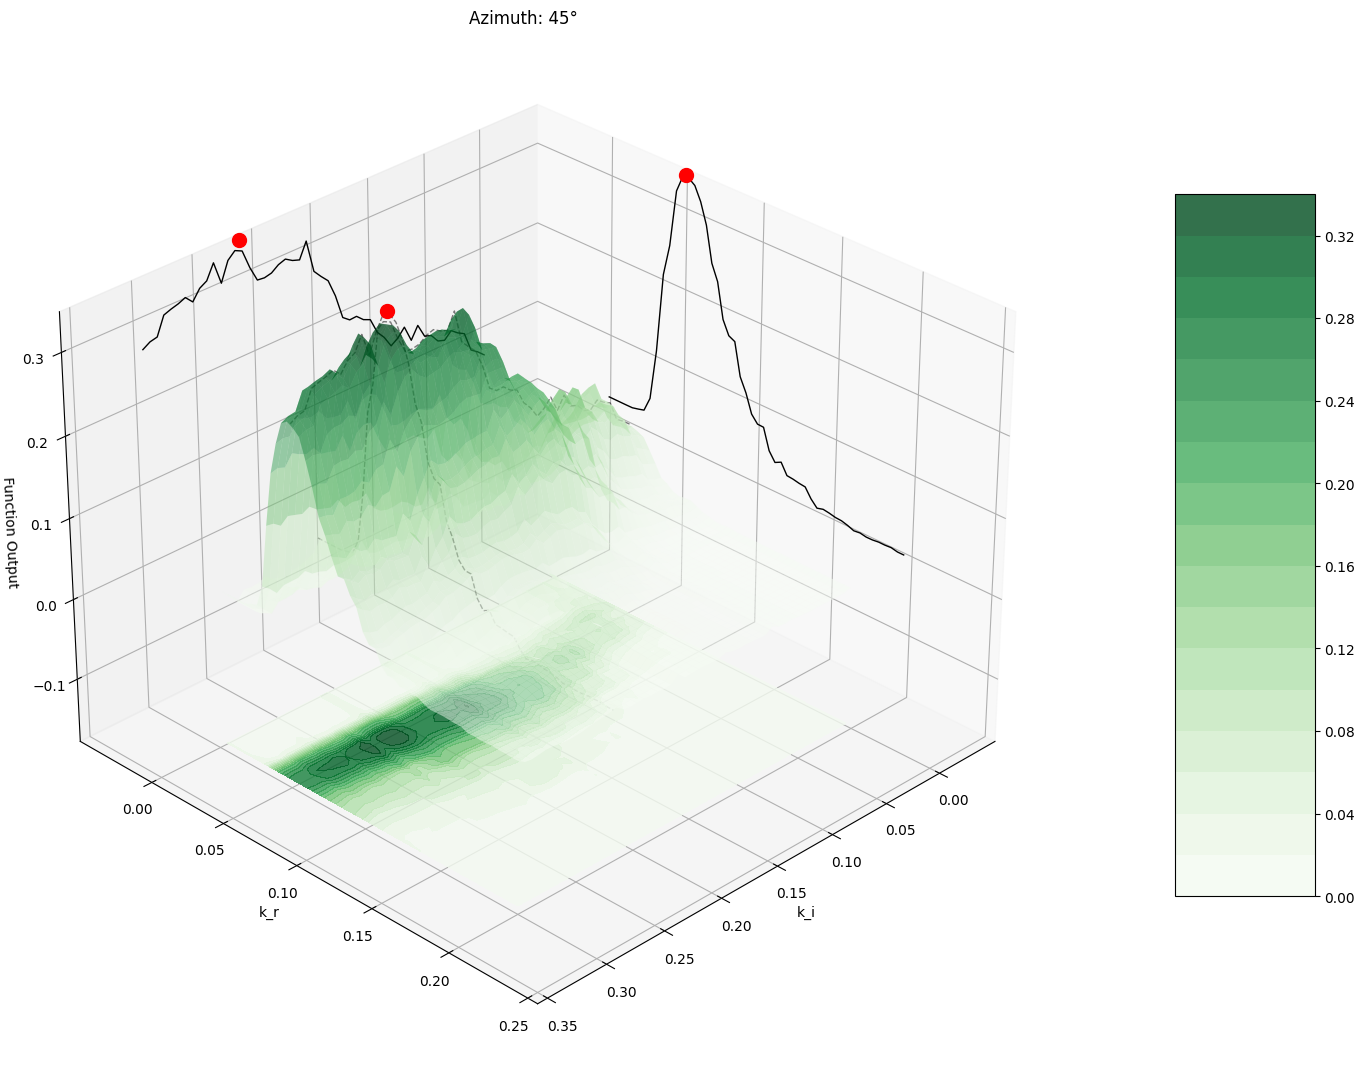

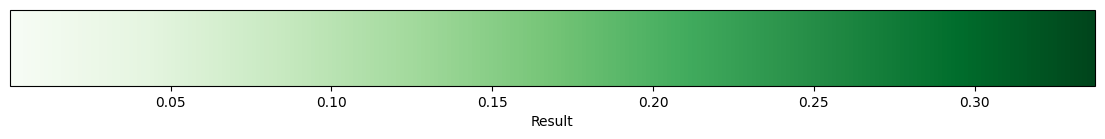

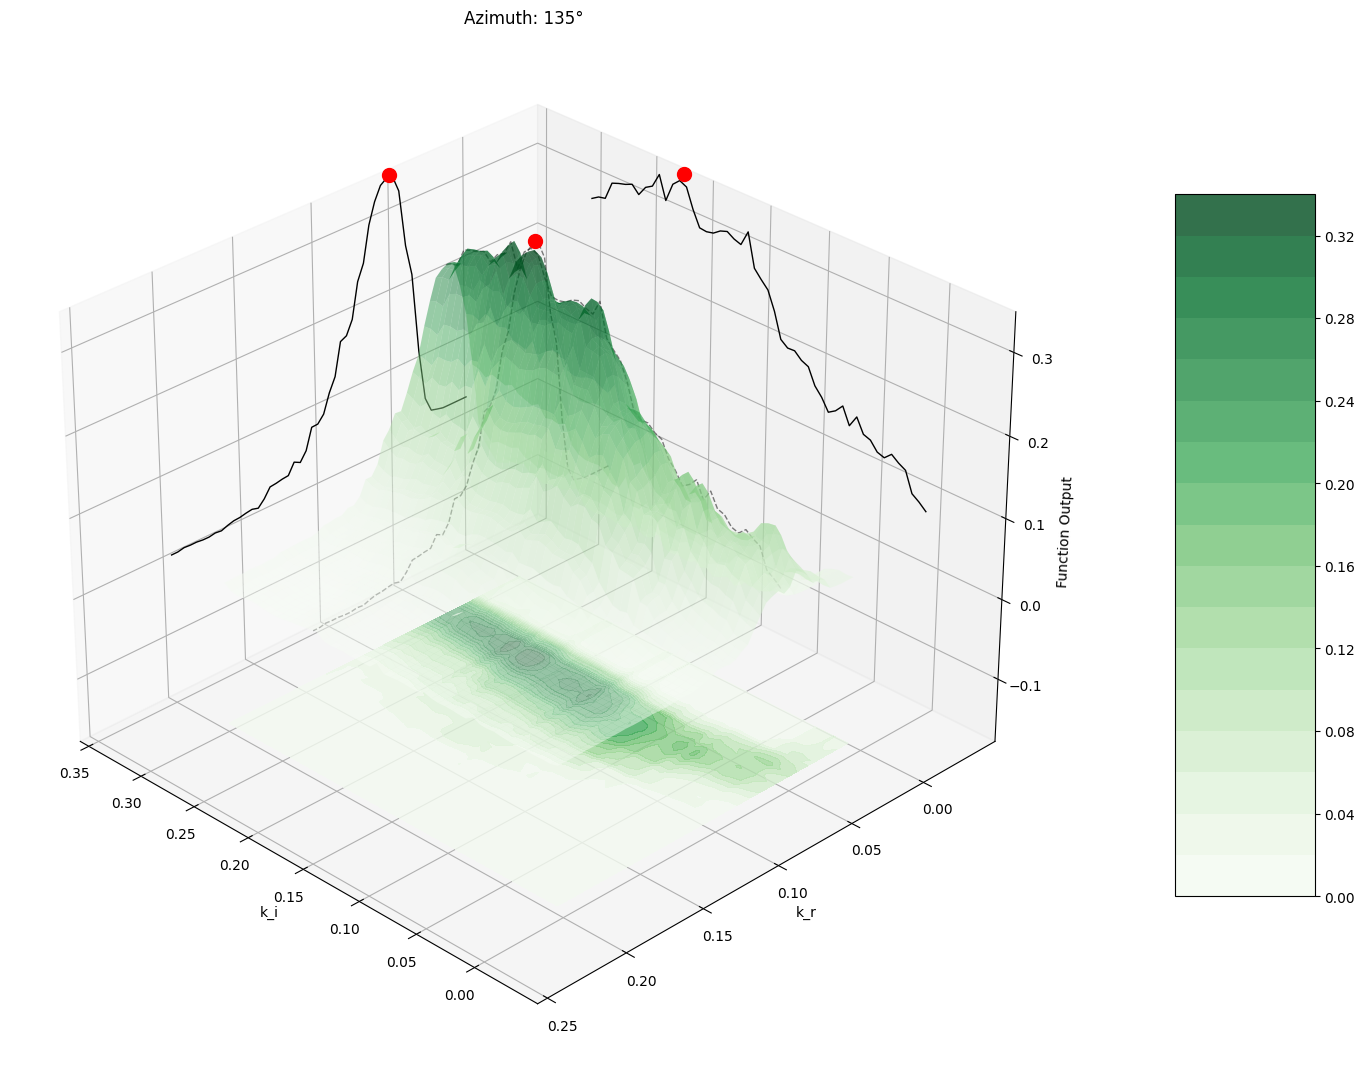

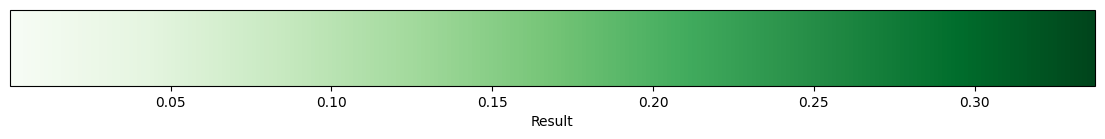

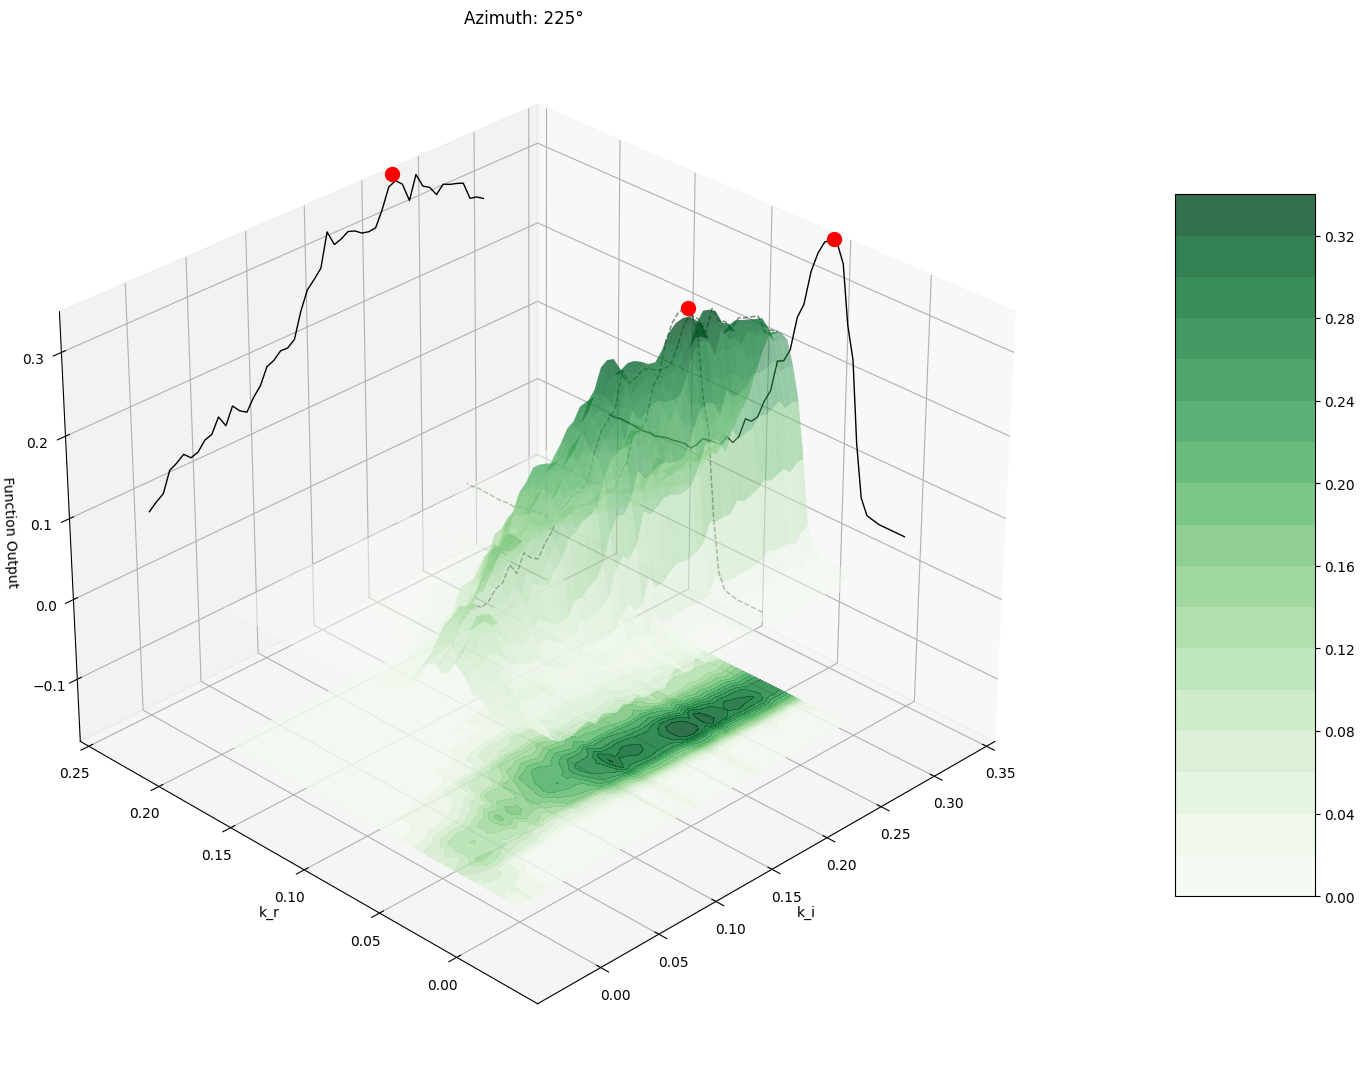

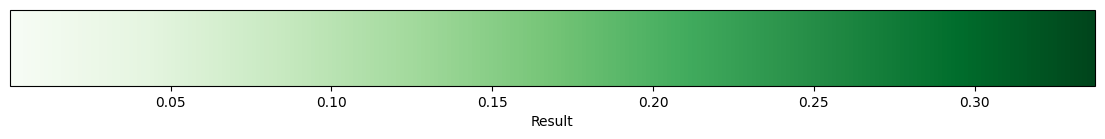

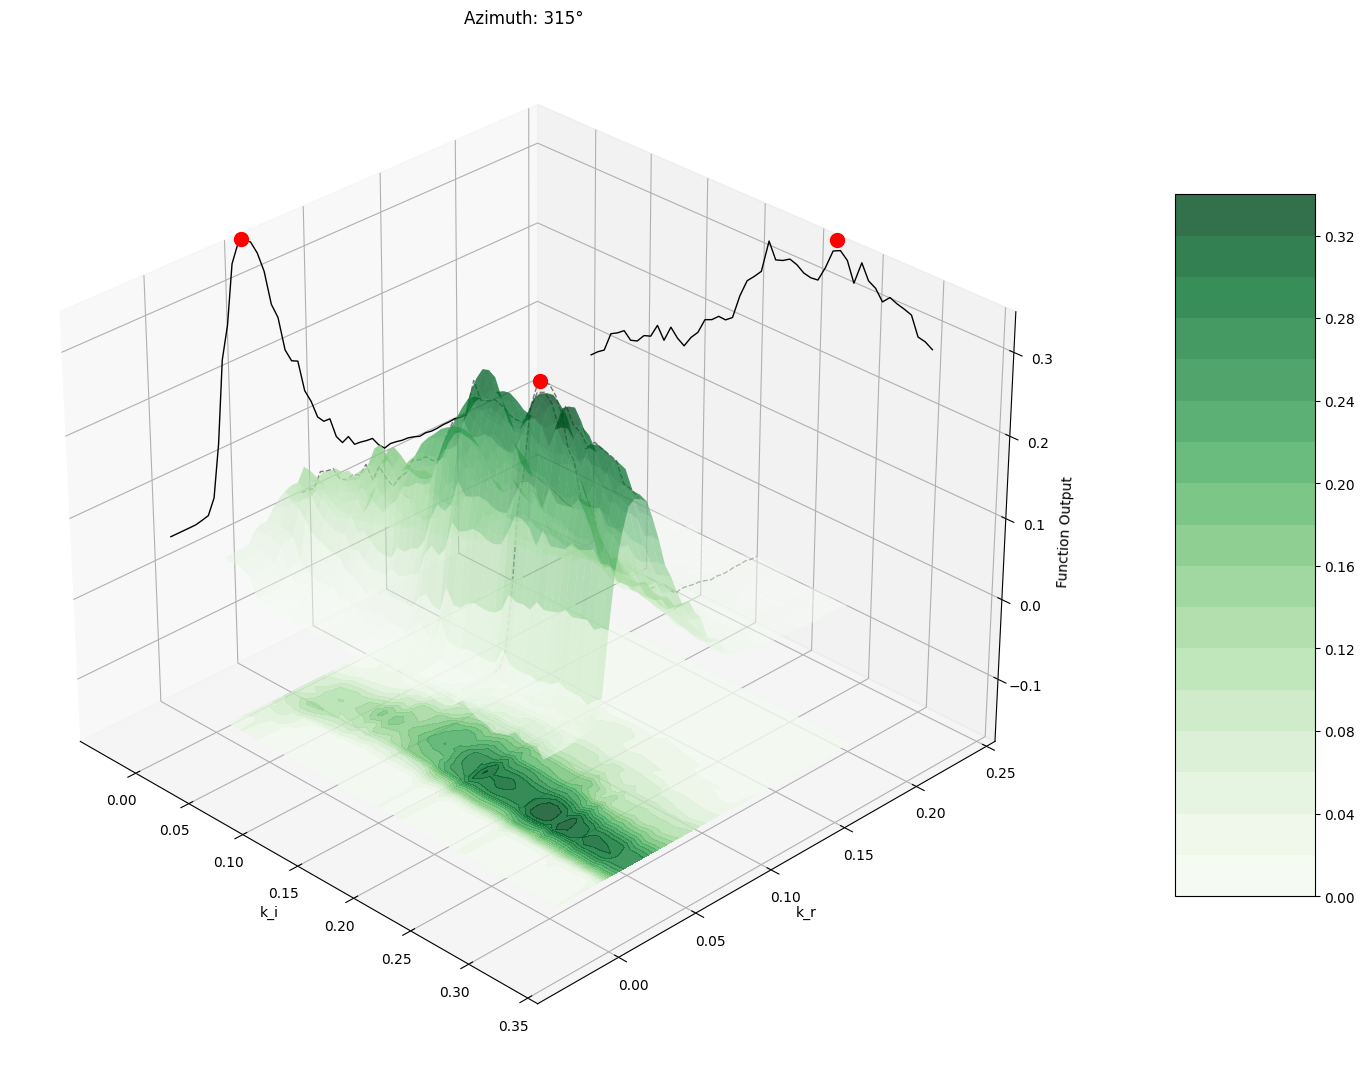

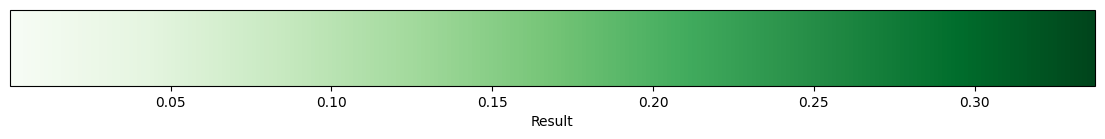

In [17]:
optimal_point_plotter = OptimalPoint3DPlotter(
    function=surrogate_function,
    param_names=['k_i', 'k_r'],
    optimal_coordinates=syn_rec.optimal_coordinates()
)

optimal_point_plotter.plot(
    x_range=(0.005, 0.3),
    y_range=(0.005, 0.2),
    x_offset=0.05,
    y_offset=0.05,
    z_offset=0.5
)

In [20]:
sir_optimal_coordinates = syn_rec.optimal_coordinates()
k_i_opt = sir_optimal_coordinates['k_i']
k_r_opt = sir_optimal_coordinates['k_r']

In [21]:
with sr as sib_run:
  model_spec = '''
    param k_i = 0.05;
    param k_r = 0.05;

    species S;
    species I;
    species R;

    rule infection {
        S|I -[ #S * %I * k_i ]-> I|I
    }

    rule recovered {
        I -[ #I * k_r ]-> R
    }
    system initial = S<90>|I<10>|R<0>;
  '''
  sib_run.load_module('population')
  sib_run.load(model_spec)
  sib_run.set_parameter('k_i', k_i_opt)
  sib_run.set_parameter('k_r', k_r_opt)
  sib_run.set_configuration('initial')
  sib_run.add_all_measures()
  sib_run.set_deadline(121)
  sib_run.set_dt(1.0)
  sib_run.set_replica(100)
  simulation_result = sib_run.simulate('test_sir_simu')
  simulation_result.plot(show_sd = True)

 The simulation has been successfully completed


## SIR (varying intervals)

Optimizing Time Interval for Infection Rate
In this scenario, we aim to identify a specific time interval during which the proportion of infected individuals remains consistently above a certain threshold. This scenario uses the same SIR model as before, but with fixed rates and different optimization parameters.
Model Parameters

Infection rate: $k_i = 0.2$ (fixed)
Recovery rate: $k_r = 0.05$ (fixed)
Initial conditions: 90 susceptible, 10 infected, 0 recovered (same as Scenario 1)

Optimization Problem
We want to find the optimal start time $a$ and duration $b$ of an interval $[a, a+b]$ during which the proportion of infected individuals stays above 30%.
Objective Function
We aim to maximize the quantitative robustness of the following STL (Signal Temporal Logic) formula:
$$
 φ_{\text{SIR}\_2}(a,b) = □_{[a,a+b]}(\text(I_{(\%)}>0.3)
$$

\varphi_{{\text{SIR}_2}}(a,b) = \Box{[a, a+b]}(\text{I}_{(%)} > 0.3)

In [23]:
synthesis_spec_intervals = '''
synthesisStrategy:
  searchSpace:
  - parameterName: "a"
    lowerBound: 0.5
    upperBound: 50.0
  - parameterName: "b"
    lowerBound: 0.5
    upperBound: 50.0
synthesisTask:
  type: "optimalFeasibility"
  taskSpecs:
      objective: "maximize"
      evaluation: "quantitative"
      model:
          module: "population"
          initialConfiguration: "initial"
          modelSpecification: |
              param k_i = 0.21;
              param k_r = 0.05;

              species S;
              species I;
              species R;

              rule infection {
                  S|I -[ #S * %I * k_i ]-> I|I
              }

              rule recovered {
                  I -[ #I * k_r ]-> R
              }
              system initial = S<90>|I<10>|R<0>;
      formulae: |
          measure %I
          formula formula_id [a=0,b=100] : ( \G[a,(a+b)][ %I > 0.3] ) endformula
'''

In [24]:
syn_rec_intervals = sr.perform_synthesis(synthesis_spec_intervals)

In [25]:
print(syn_rec_intervals)

Optimal Coordinates: {'a': 21.72038546779949, 'b': 1.9968370841401075}
Optimal Value (Objective Function): 0.10929999999999998
Optimal Value (Surrogate Function): 0.09966132080253065


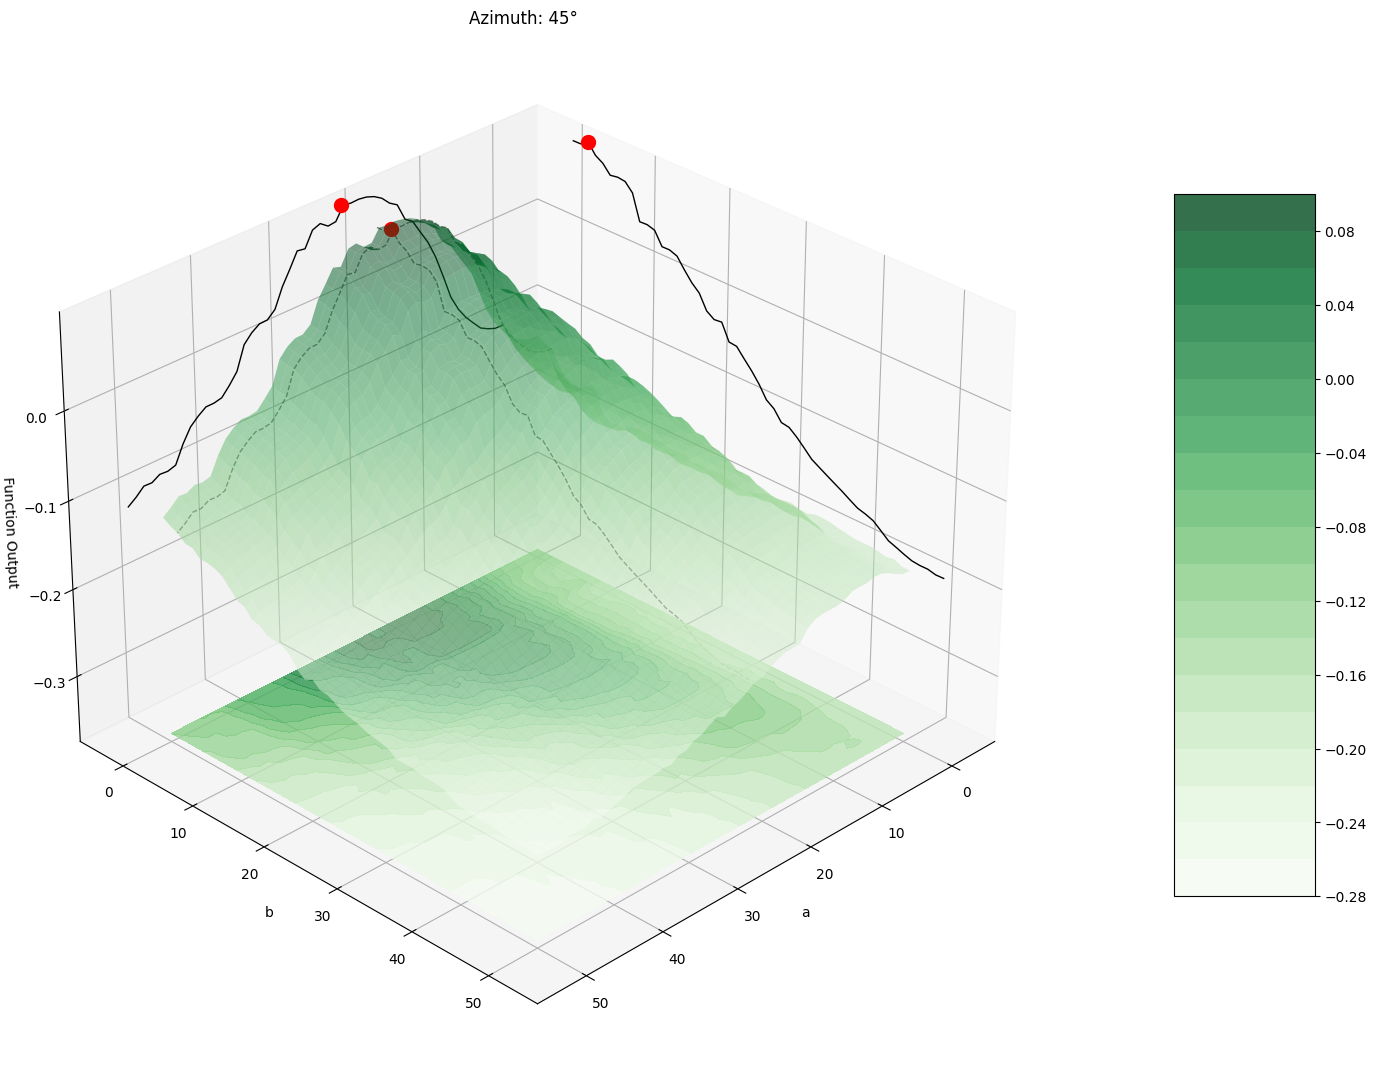

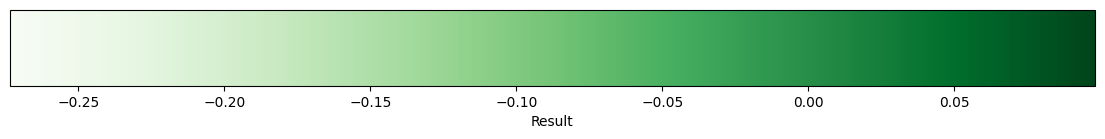

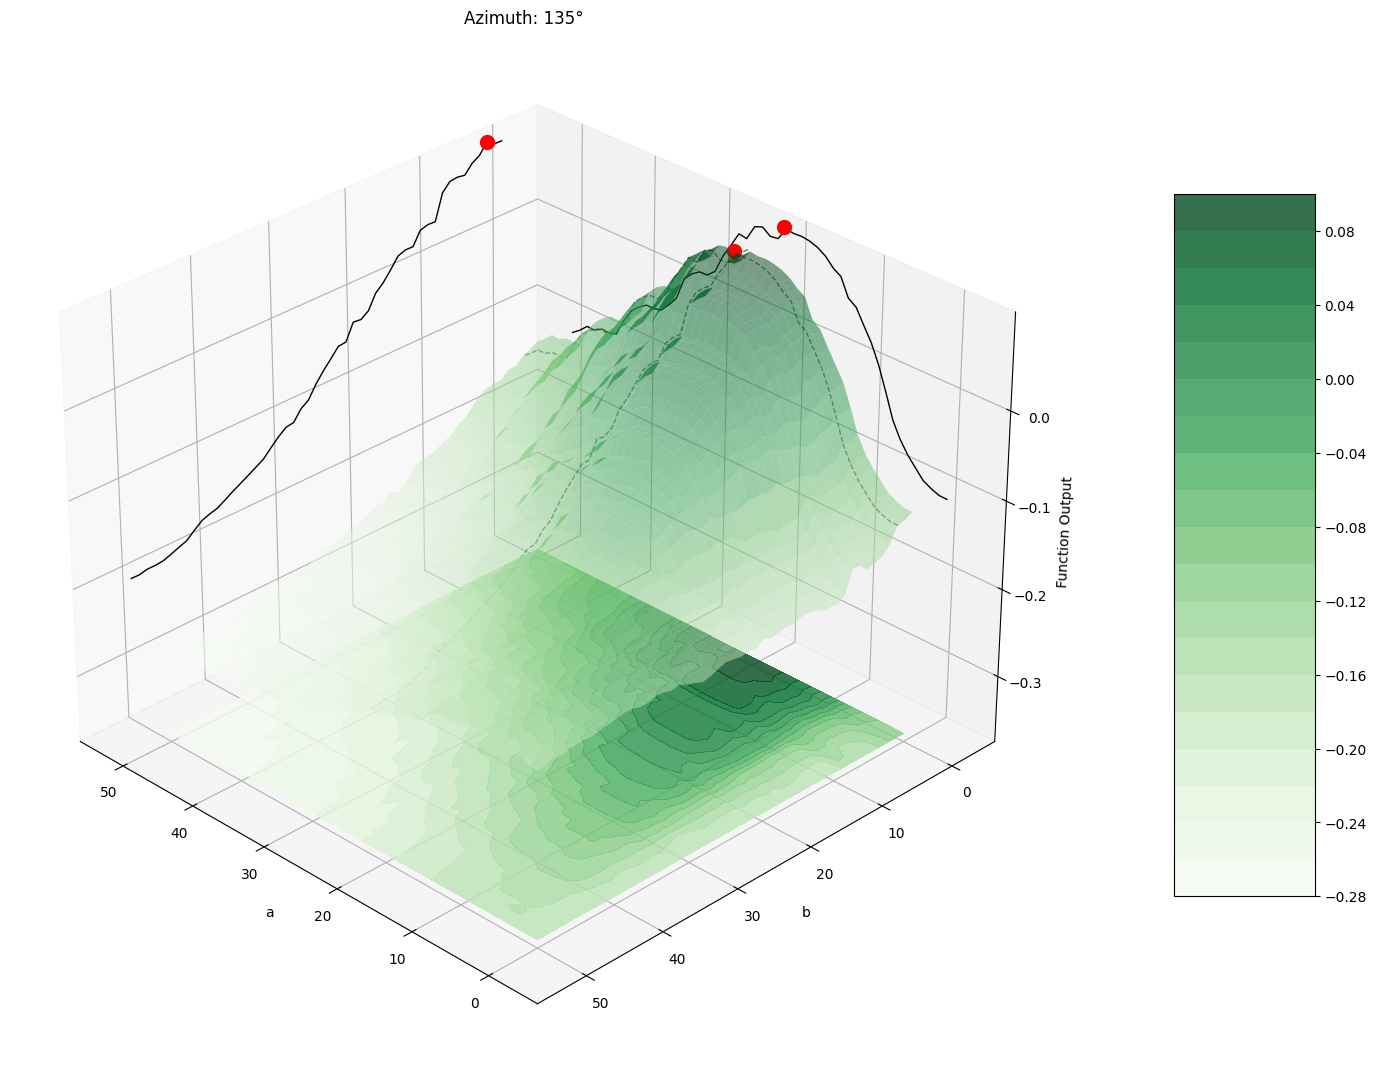

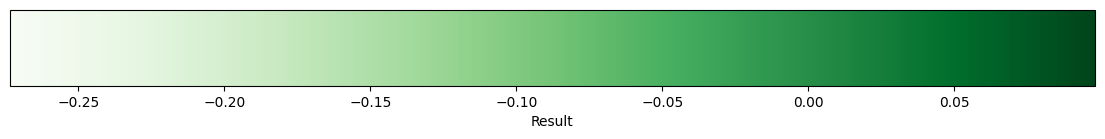

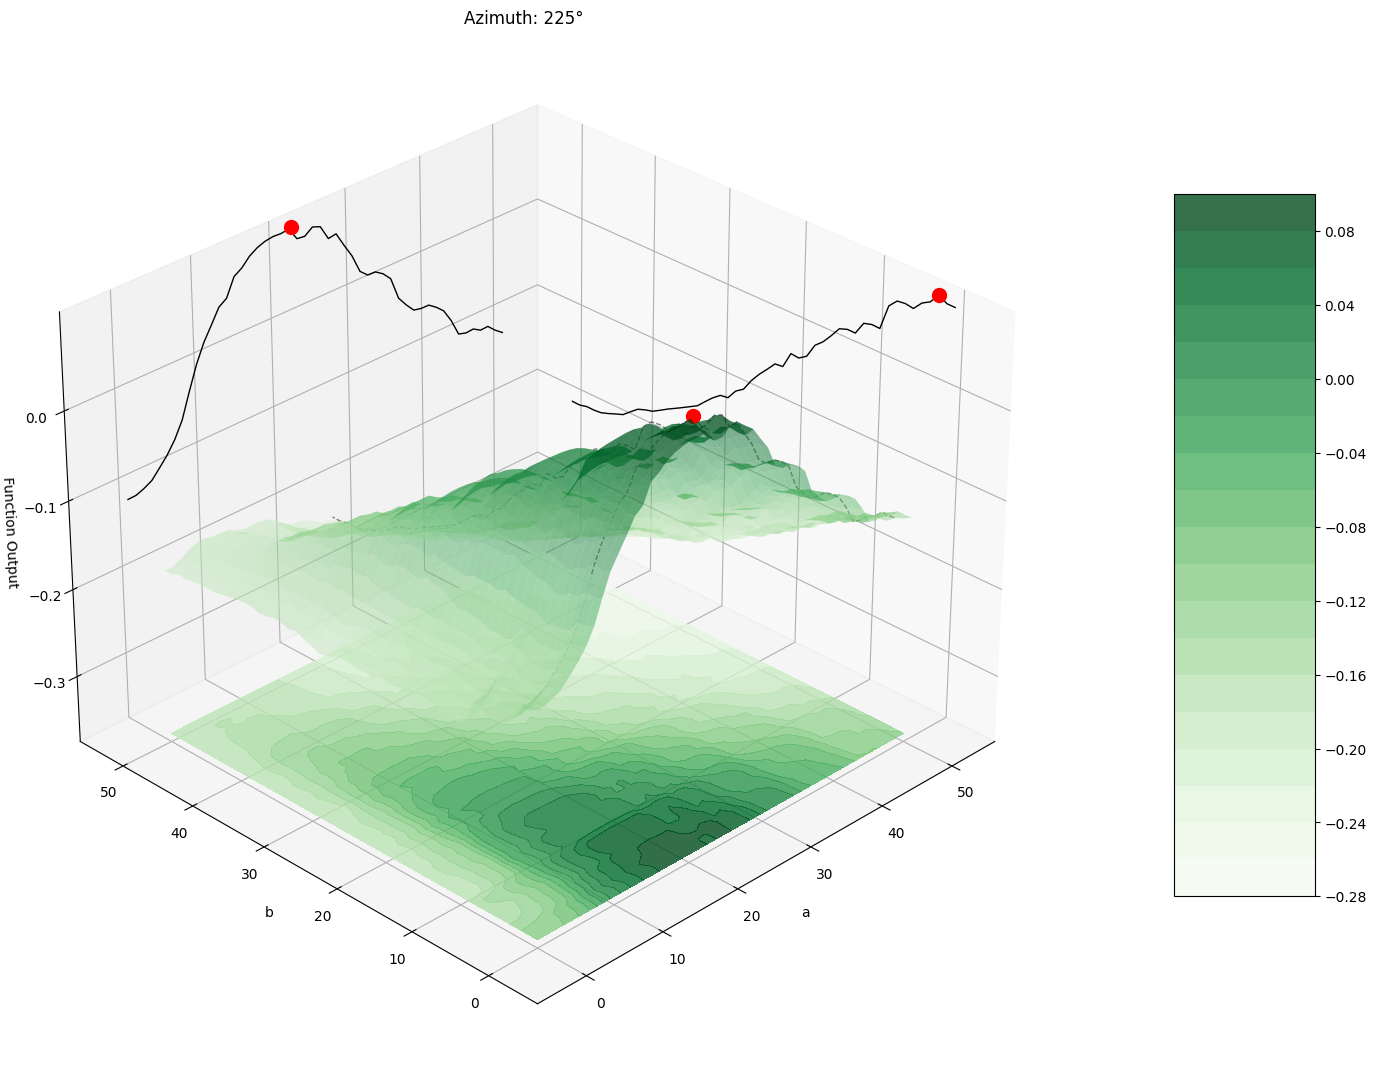

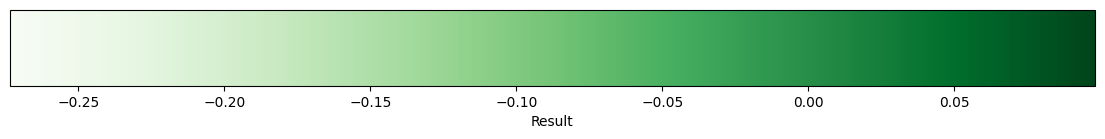

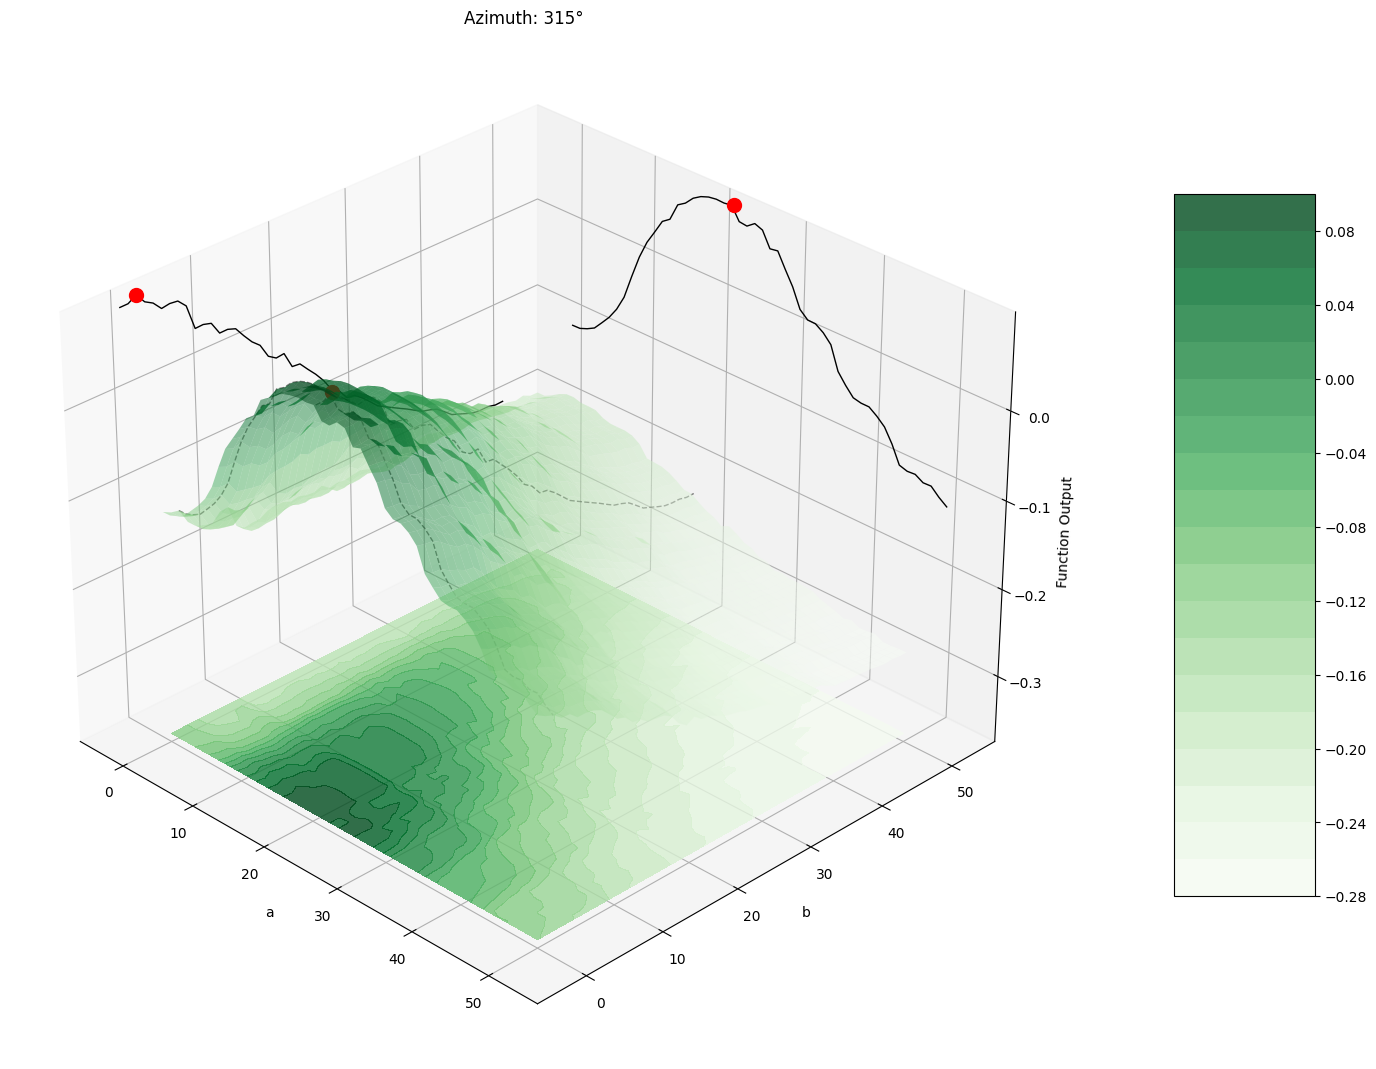

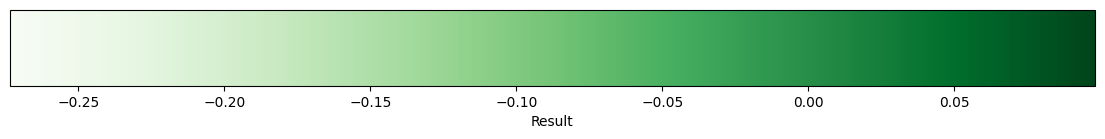

In [26]:
optimal_point_plotter_intervals = OptimalPoint3DPlotter(
    function=syn_rec_intervals.surrogate_function(),
    param_names=['a', 'b'],
    optimal_coordinates=syn_rec_intervals.optimal_coordinates()
)


optimal_point_plotter_intervals.plot(
    x_range=(0.0, 50.0),
    y_range=(0.0, 50.0),
    x_offset=5,
    y_offset=5,
    z_offset=0.25
)